In [57]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [58]:
train_input.shape

(60000, 28, 28)

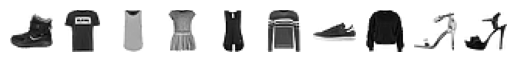

In [59]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10)

for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [60]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [61]:
import numpy as np
np.unique(train_target, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [62]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [63]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
cv = cross_validate(sgd, train_scaled, train_target, n_jobs=-1)
print(np.mean(cv['test_score']))

0.8192833333333333


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_mo

In [64]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [65]:
train_scaled.shape, val_scaled.shape

((48000, 784), (12000, 784))

In [66]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [67]:
model = keras.Sequential(dense)

In [70]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [71]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6044 - accuracy: 0.7963
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4731 - accuracy: 0.8392
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4495 - accuracy: 0.8480
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4369 - accuracy: 0.8523
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4282 - accuracy: 0.8561


In [73]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4527 - accuracy: 0.8456


[0.45273298025131226, 0.8455833196640015]